# **전체 목표 : 다음 분기에 어떤 게임을 설계해야 할까**

1) 현재 상황 요약: 현재 회사의 출시 게임 순위와 상황 요약

2) 출시 타겟: 다음 분기에 출시할 게임의 지역, 장르, 플랫폼 등 출시 타겟 요약

3) 결론

# **데이터 전처리**

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,264 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and di

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
import matplotlib as mpl

mpl.rc('font', family='NanumGothic') 
mpl.rc('axes', unicode_minus=False)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 예쁜 스타일
sns.set_palette("pastel")
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")

In [5]:
# 상위 5개 데이터 출력
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
# 데이터 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [7]:
# 결측치 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
# 'Unnamed: 0' column 삭제
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# 'Year' 결측치는 9999로 처리 후 타입 변경 
df['Year'] = df['Year'].fillna(9999).astype('int')

In [10]:
# 'Year' 값 확인
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 9999, 1984, 1998, 2016, 1985,
       1999,    9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,
         15, 1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8,
       1986,    1,    5,    4,   10,   98,    7,   16,   86,   14,   95,
       2017, 1980, 2020,    2,   13,    0,   12,   94])

In [11]:
# Year 열에서 값이 0보다 크고 1000보다 작은 행만 추출
df[(df['Year'] >= 0) & (df['Year'] < 1000)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [12]:
# Year 열에서 값이 0인 것은 결측치로, 해당 발매연도를 하나하나 추정하기 힘듬
# 값이 0이 아닌 것들은 앞의 연도 표기가 누락된 것으로 확인되어 4자리 형태의 Year로 대체하기로 함
df.loc[(df['Year'] >= 80) & (df['Year'] < 100) , 'Year'] = df.loc[(df['Year'] >= 80) & (df['Year'] < 100) , 'Year'] + 1900
df.loc[(df['Year'] >= 0) & (df['Year'] < 31), 'Year'] = df.loc[(df['Year'] >= 0) & (df['Year'] < 31), 'Year'] + 2000
df['Year'] = df['Year'].astype(int)

In [13]:
# 'Year' 값 확인
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 9999, 1984, 1998, 2016, 1985,
       1999, 1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983,
       1988, 1981, 1989, 1986, 2017, 1980, 2020])

In [14]:
# 2020년 자료가 잘못 들어있어서 값 보정 (1개라서 가능)
# Imagine: Makeup Artist
df.loc[df['Year'] == '2020', 'Name'] = 2009
df = df[df['Year'] != 2020].reset_index(drop=True)

In [15]:
# 'Year' 값 확인
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 9999, 1984, 1998, 2016, 1985,
       1999, 1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983,
       1988, 1981, 1989, 1986, 2017, 1980])

In [16]:
# 2017년 자료가 3개 밖에 되지 않아 2017년도 자료는 제외함
df = df[df['Year'] < 2017]

In [17]:
# 'Genre'의 결측치 행 삭제
df.dropna(subset=['Genre'], inplace=True)

# 'Publisher'의 결측치 행 삭제
df.dropna(subset=['Publisher'], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [19]:
# 각 나라별 판매량 단위 및 형태 확인 (대표로 NA_Sales 확인함)
df.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [20]:
# 문제점
# 1. 판매량 단위가 통일되지 않았음 : K, M 통일 필요
# 2. 변수형 변경 필요 : object -> float

In [21]:
# 1. NA_Sales, EU_Sales, JP_Sales, Other_Sales 열의 판매량 단위를 Million으로 통일
# 2. 판매량 단위 변경과 동시에 변수형 변경하여 return
def convert_to_millions(val):
    if 'K' in val:
        return round(float(val.replace('K', '')) / 1000, 2)
    elif 'M' in val:
        return round(float(val.replace('M', '')),2)
    else:
        return round(float(val),2)

In [22]:
df['NA_Sales'] = df['NA_Sales'].apply(convert_to_millions)
df['EU_Sales'] = df['EU_Sales'].apply(convert_to_millions)
df['JP_Sales'] = df['JP_Sales'].apply(convert_to_millions)
df['Other_Sales'] = df['Other_Sales'].apply(convert_to_millions)

In [23]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [24]:
# 각 지역별 판매량을 합산한 전체 판매량 column 추가
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [25]:
# Year 값이 9999인 것 따로 보관
df_year_9999 = df[df['Year'] == 9999]

# Year 값이 9999인 것은 삭제
df = df[df['Year'] != 9999]

# **<임의로 정해야 하는 나의 상황들>**
- 현재 나의 회사 : 현재 데이터 상 전체 Year & 전체 지역에서의 총 판매량에서 상위 약 15% 순위인 회사 : Valve Software
- 현재 분기는? : 현재는 2016년 4분기. 2019년 1분기에 출시할 게임 설계 필요 (나의 결과와 실제 2019년 1분기에 이런 게임이 인기가 많았는지 대조해보고 싶음)
- 출시할 게임의 목표 판매량은? : 현재 상위 10% 순위인 회사의 판매량 이상


In [26]:
top_publishers = df.groupby('Publisher')['Total_Sales'].sum().reset_index().sort_values('Total_Sales', ascending=False)
top_publishers_list = top_publishers['Publisher'].tolist()
# 회사는 총 575개

quarter_company_index = len(top_publishers) // 6

my_company = top_publishers.iloc[quarter_company_index]['Publisher']
print(my_company)

Valve Software


- 현재 회사의 상황 분석 : 출시 게임 리스트 및 순위

In [27]:
# 현재인 2017년까지 2개의 게임을 3개의 플랫폼에서 출시
valve_games = df[(df['Publisher'] == 'Valve Software') | (df['Publisher'] == 'Valve')]
valve_games.sort_values(by='Year')

valve_games


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3111,Left 4 Dead 2,PC,2009,Shooter,Valve Software,0.00,0.32,0.00,0.04,0.36
8360,Portal 2,X360,2011,Shooter,Valve Software,1.41,0.51,0.01,0.17,2.10
13263,Portal 2,PC,2011,Shooter,Valve Software,0.33,0.32,0.00,0.11,0.76
13385,Portal 2,PS3,2011,Shooter,Valve,0.83,0.63,0.02,0.25,1.73


In [28]:
# publisher는 다르지만 이름이 동일한 게임이 있는지 확인
# 제작사는 같되, 배포사 및 플랫폼이 다른 것으로 판단. 해당 게임의 이름으로 모두 추출
valve_games_all = df[(df['Name'] == 'Left 4 Dead 2')|(df['Name'] == 'Portal 2')]

valve_games_all

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
192,Left 4 Dead 2,X360,2009,Shooter,Electronic Arts,2.67,0.89,0.05,0.37,3.98
3111,Left 4 Dead 2,PC,2009,Shooter,Valve Software,0.00,0.32,0.00,0.04,0.36
8360,Portal 2,X360,2011,Shooter,Valve Software,1.41,0.51,0.01,0.17,2.10
13263,Portal 2,PC,2011,Shooter,Valve Software,0.33,0.32,0.00,0.11,0.76
13385,Portal 2,PS3,2011,Shooter,Valve,0.83,0.63,0.02,0.25,1.73


In [29]:
# Left 4 Dead 2	분석
# - 2009년 발매 게임 중 'Left 4 Dead 2' 게임의 전체 판매량 순위

# 2009년에 발매된 모든 게임의 판매량 합산
sales_2009 = df[df['Year'] == 2009].groupby(['Name', 'Platform', 'Publisher'])['Total_Sales'].sum()
sales_2009 = sales_2009.sort_values(ascending=False).reset_index()
sales_2009_sum = sales_2009['Total_Sales'].sum()

# 2009년에 발매된 모든 게임의 판매량을 기준으로 left_4_dead_2_sales의 순위 구하기
l4d2_x360 = sales_2009[(sales_2009['Name'] == 'Left 4 Dead 2') & (sales_2009['Platform'] == 'X360')]
l4d2_pc = sales_2009[(sales_2009['Name'] == 'Left 4 Dead 2') & (sales_2009['Platform'] == 'PC')]
rank_x360 = l4d2_x360.index[0] + 1
rank_pc = l4d2_pc.index[0] + 1

print('2009년 총 발매 게임 개수 : ', len(sales_2009))
print('Left 4 Dead 2(X360)의 2009년 게임 순위 : ', rank_x360)
print('Left 4 Dead 2(PC)의 2009년 게임 순위 : ', rank_pc)
print('\n')

print('2009년 총 판매량 (전지역) : ', round(sales_2009_sum, 2))
print('Left 4 Dead 2(X360)의 2009년 총 판매량 (전지역) : ', (sales_2009.iloc[rank_x360 - 1].Total_Sales))
print('Left 4 Dead 2(PC)의 2009년 총 판매량 (전지역) : ', (sales_2009.iloc[rank_pc - 1].Total_Sales))


2009년 총 발매 게임 개수 :  1428
Left 4 Dead 2(X360)의 2009년 게임 순위 :  20
Left 4 Dead 2(PC)의 2009년 게임 순위 :  399


2009년 총 판매량 (전지역) :  665.84
Left 4 Dead 2(X360)의 2009년 총 판매량 (전지역) :  3.98
Left 4 Dead 2(PC)의 2009년 총 판매량 (전지역) :  0.36


In [30]:
# Portal 2 분석
# - 2011년 발매 게임 중 'Portal 2' 게임의 전체 판매량 순위

# 2011년에 발매된 모든 게임의 판매량 합산
sales_2011 = df[df['Year'] == 2011].groupby(['Name', 'Platform', 'Publisher'])['Total_Sales'].sum()
sales_2011 = sales_2011.sort_values(ascending=False).reset_index()
sales_2011_sum = sales_2011['Total_Sales'].sum()

# 2011년에 발매된 모든 게임의 판매량을 기준으로 Portal 2의 순위 구하기
p2_x360 = sales_2011[(sales_2011['Name'] == 'Portal 2') & (sales_2011['Platform'] == 'X360')]
p2_pc = sales_2011[(sales_2011['Name'] == 'Portal 2') & (sales_2011['Platform'] == 'PC')]
p2_ps3 = sales_2011[(sales_2011['Name'] == 'Portal 2') & (sales_2011['Platform'] == 'PS3')]

rank_x360 = p2_x360.index[0] + 1
rank_pc = p2_pc.index[0] + 1
rank_ps3 = p2_ps3.index[0] + 1

print('2011년 총 발매 게임 개수 : ', len(sales_2011))
print('Portal 2(X360)의 2011년 게임 순위 : ', rank_x360)
print('Portal 2(PS3)의 2011년 게임 순위 : ', rank_ps3)
print('Portal 2(PC)의 2011년 게임 순위 : ', rank_pc)
print('\n')

print('2011년 총 판매량 (전지역) : ', round(sales_2011_sum, 2))
print('Portal 2(X360)의 2011년 총 판매량 (전지역) : ', (sales_2011.iloc[rank_x360 - 1].Total_Sales))
print('Portal 2(PS3)의 2011년 총 판매량 (전지역) : ', (sales_2011.iloc[rank_ps3 - 1].Total_Sales))
print('Portal 2(PC)의 2011년 총 판매량 (전지역) : ', (sales_2011.iloc[rank_pc - 1].Total_Sales))


2011년 총 발매 게임 개수 :  1133
Portal 2(X360)의 2011년 게임 순위 :  48
Portal 2(PS3)의 2011년 게임 순위 :  57
Portal 2(PC)의 2011년 게임 순위 :  149


2011년 총 판매량 (전지역) :  514.85
Portal 2(X360)의 2011년 총 판매량 (전지역) :  2.1
Portal 2(PS3)의 2011년 총 판매량 (전지역) :  1.73
Portal 2(PC)의 2011년 총 판매량 (전지역) :  0.76


In [87]:
# 출시 예정 게임 목표 판매량 설정
goal_sales = top_publishers.iloc[56]["Total_Sales"]
goal_sales

7.28

In [88]:
# 우리 회사의 현재 판매량
valve_sales = df[df['Publisher'] == 'Valve Software']['Total_Sales'].sum()
valve_sales

# 화이팅

3.2199999999999998

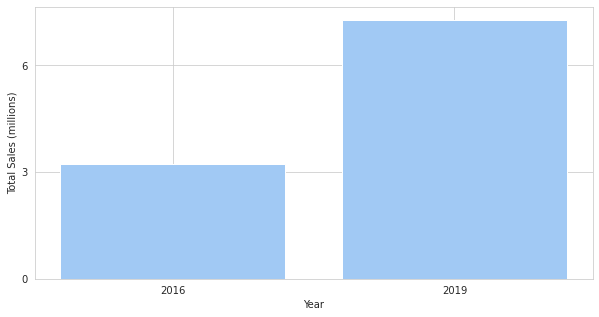

In [94]:
# 시각화하기
x = ['2016', '2019']
y = [3.22, 7.28]

plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.yticks(range(0, 9, 3))
plt.bar(x, y)
plt.show()


# **<데이터에서 확정해야 할 것>**

1. 시장 변화 추세
- 연도별 플랫폼 변화 추세
- 연도별 장르 변화 추세
- 연도별 인기 많은 게임 분석

2. 출시 타겟 지역은?
- 시장 규모가 큰 지역 : 게임 수요가 높은 지역(수익성 고려)
- 2019년에도 그 지역의 게임 수요가 여전히 높을까?

3. 어떤 게임 장르를 출시를 할까?
- 해당 지역에서의 선호 게임 장르 파악
- 해당 지역에서, 미래(2019년 2분기)에는 어떤 게임의 선호도가 높을까?
> *고려해야 할 점*
> - 결과가 현재 플랫폼 추세에 적합한 게임인가?
> - 플랫폼과 게임 장르의 합이 맞지 않으면 어떤 것을 우선적으로 고려해야 하나? 

4. 어떤 플랫폼부터 출시를 할까?
- 해당 타겟 지역에서의 플랫폼 변화 추이 확인 필요

In [31]:
# 필요한 데이터 추출
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# 1. 시장 변화 추세
- 연도별 게임 전체 발매량 변화 추세
- 연도별 플랫폼 변화 추세
- 연도별 장르 변화 추세
- 연도별 인기 많은 게임 분석

<AxesSubplot:xlabel='Year'>

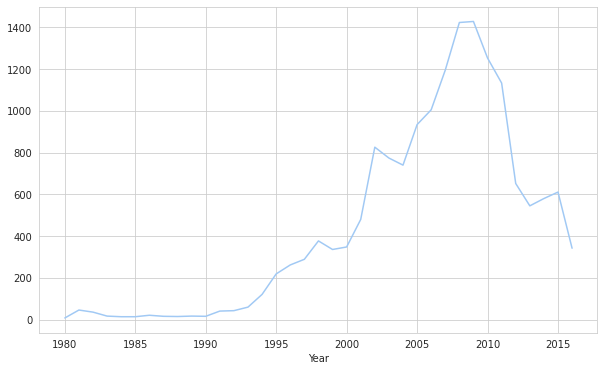

In [32]:
# 연도별 게임 발매량 변화 추세
yearly_counts = df.groupby('Year')['Name'].count()

# 시각화
yearly_counts.plot(kind="line", figsize=(10,6))

In [33]:
# 1) 연도별 플랫폼 변화 추세
df_2000_2009 = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]
df_2010_2016 = df[(df['Year'] >= 2010) & (df['Year'] < 2017)]
df_2000_2016 = df[(df['Year'] >= 2000) & (df['Year'] < 2017)] 

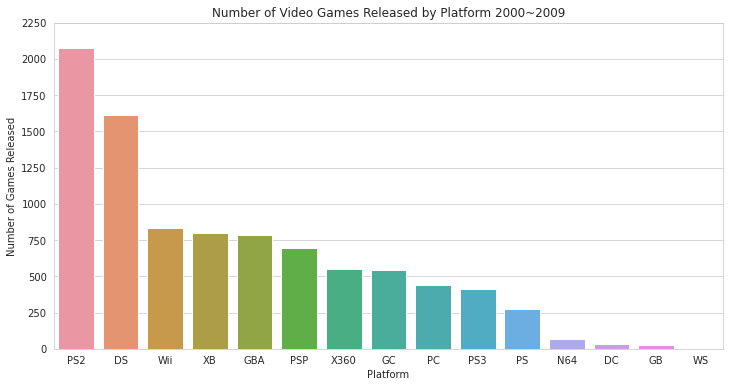

In [34]:
# 2000~2009 플랫폼별 발매 건수 구하기
platform_year_count = df_2000_2009.groupby(['Year', 'Platform']).agg({'Name': 'count'}).reset_index()

# 전체 발매 수에서 가장 비율이 높은 플랫폼 구하기
total_count_p = platform_year_count.groupby('Platform').agg({'Name': 'sum'}).reset_index()
total_count_p['Percent'] = total_count_p['Name'] / total_count_p['Name'].sum() * 100
total_count_p = total_count_p.sort_values(by='Percent', ascending=False)

# 시각화하기
plt.figure(figsize=(12, 6))
sns.barplot(data=total_count_p, x='Platform', y='Name')
plt.title('Number of Video Games Released by Platform 2000~2009')
plt.xlabel('Platform')
plt.ylabel('Number of Games Released')
plt.ylim([0, 2250])
plt.yticks(range(0, 2251, 250))
plt.show()


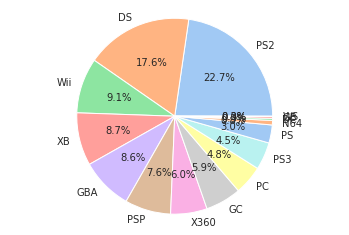

In [35]:
# 파이차트
labels = total_count_p['Platform']
sizes = total_count_p['Percent']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.show()

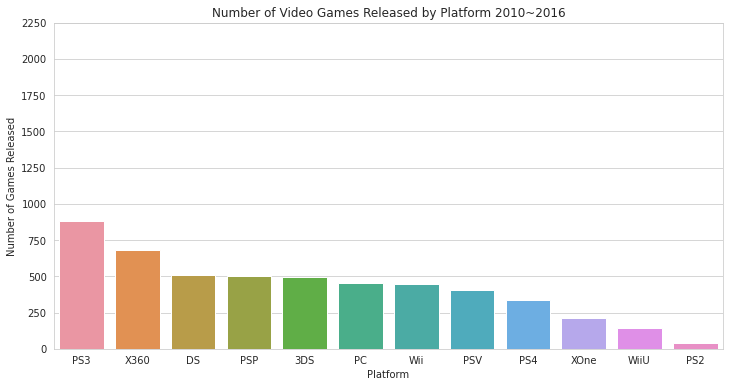

In [36]:
# 2010~2016 플랫폼별 발매 건수 구하기
platform_year_count = df_2010_2016.groupby(['Year', 'Platform']).agg({'Name': 'count'}).reset_index()

# 전체 발매 수에서 가장 비율이 높은 플랫폼 구하기
total_count_p = platform_year_count.groupby('Platform').agg({'Name': 'sum'}).reset_index()
total_count_p['Percent'] = total_count_p['Name'] / total_count_p['Name'].sum() * 100
total_count_p = total_count_p.sort_values(by='Percent', ascending=False)

# 시각화하기
plt.figure(figsize=(12, 6))
sns.barplot(data=total_count_p, x='Platform', y='Name')
plt.title('Number of Video Games Released by Platform 2010~2016')
plt.xlabel('Platform')
plt.ylabel('Number of Games Released')
plt.ylim([0, 2250])
plt.yticks(range(0, 2251, 250))
plt.show()


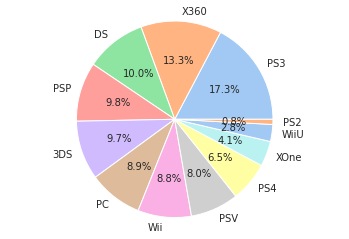

In [37]:
# 파이차트
labels = total_count_p['Platform']
sizes = total_count_p['Percent']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.show()

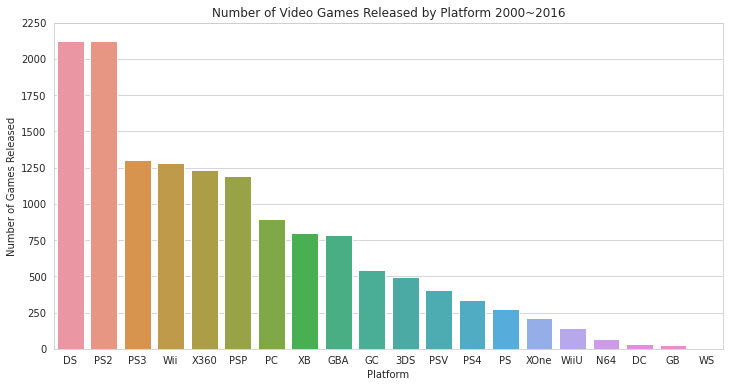

In [38]:
# 2000~2016 플랫폼별 발매 건수 구하기
platform_year_count = df_2000_2016.groupby(['Year', 'Platform']).agg({'Name': 'count'}).reset_index()

# 전체 발매 수에서 가장 비율이 높은 플랫폼 구하기
total_count_p = platform_year_count.groupby('Platform').agg({'Name': 'sum'}).reset_index()
total_count_p['Percent'] = total_count_p['Name'] / total_count_p['Name'].sum() * 100
total_count_p = total_count_p.sort_values(by='Percent', ascending=False)

# 시각화하기
plt.figure(figsize=(12, 6))
sns.barplot(data=total_count_p, x='Platform', y='Name')
plt.title('Number of Video Games Released by Platform 2000~2016')
plt.xlabel('Platform')
plt.ylabel('Number of Games Released')
plt.ylim([0, 2250])
plt.yticks(range(0, 2251, 250))
plt.show()


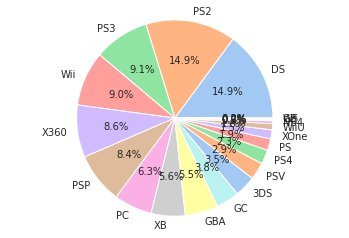

In [39]:
# 파이차트
labels = total_count_p['Platform']
sizes = total_count_p['Percent']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.show()

In [40]:
# 각 연도별로 플랫폼당 발매 비율 구하기
total_count_p = platform_year_count.groupby('Year').agg({'Name': 'sum'}).reset_index()
platform_year_count = platform_year_count.merge(total_count_p, on='Year', suffixes=('', '_total'))
platform_year_count['Percent'] = platform_year_count['Name'] / platform_year_count['Name_total'] * 100

In [41]:
platforms = platform_year_count['Platform'].unique()

# 플랫폼별로 데이터프레임 생성하여 리스트에 추가
platform_dfs = []
for platform in platforms:
    platform_df = platform_year_count[platform_year_count['Platform'] == platform].copy()
    platform_df.drop(['Platform', 'Name_total', 'Percent'], axis=1, inplace=True)
    platform_df.set_index('Year', inplace=True)
    platform_df.rename(columns={'Name': platform}, inplace=True)
    platform_dfs.append(platform_df)

# 플랫폼별 데이터프레임을 연도순으로 합치기
merged_df = platform_dfs[0]
for i in range(1, len(platform_dfs)):
    merged_df = merged_df.merge(platform_dfs[i], on='Year', how='outer')

# 결과 출력
print(merged_df)

        DC    GB    GBA   N64   PC     PS    PS2   WS     XB     GC     DS  \
Year                                                                         
2000  20.0  17.0    1.0  59.0    7  159.0   82.0  2.0    1.0    NaN    NaN   
2001   8.0  10.0  106.0   9.0   15   91.0  184.0  2.0   33.0   22.0    NaN   
2002   1.0   NaN  197.0   1.0   19   19.0  280.0  NaN  157.0  152.0    NaN   
2007   1.0   NaN    5.0   NaN   62    NaN  214.0  NaN    3.0    4.0  377.0   
2008   1.0   NaN    NaN   NaN   75    NaN  190.0  NaN    1.0    NaN  490.0   
2003   NaN   NaN  150.0   NaN   33    3.0  256.0  NaN  189.0  143.0    NaN   
2004   NaN   NaN  156.0   NaN   31    NaN  258.0  NaN  174.0   83.0   23.0   
2005   NaN   NaN  130.0   NaN   37    NaN  260.0  NaN  179.0   97.0  117.0   
2006   NaN   NaN   39.0   NaN   52    NaN  258.0  NaN   62.0   40.0  202.0   
2009   NaN   NaN    NaN   NaN  109    NaN   96.0  NaN    NaN    NaN  405.0   
2010   NaN   NaN    NaN   NaN   87    NaN   36.0  NaN    NaN    

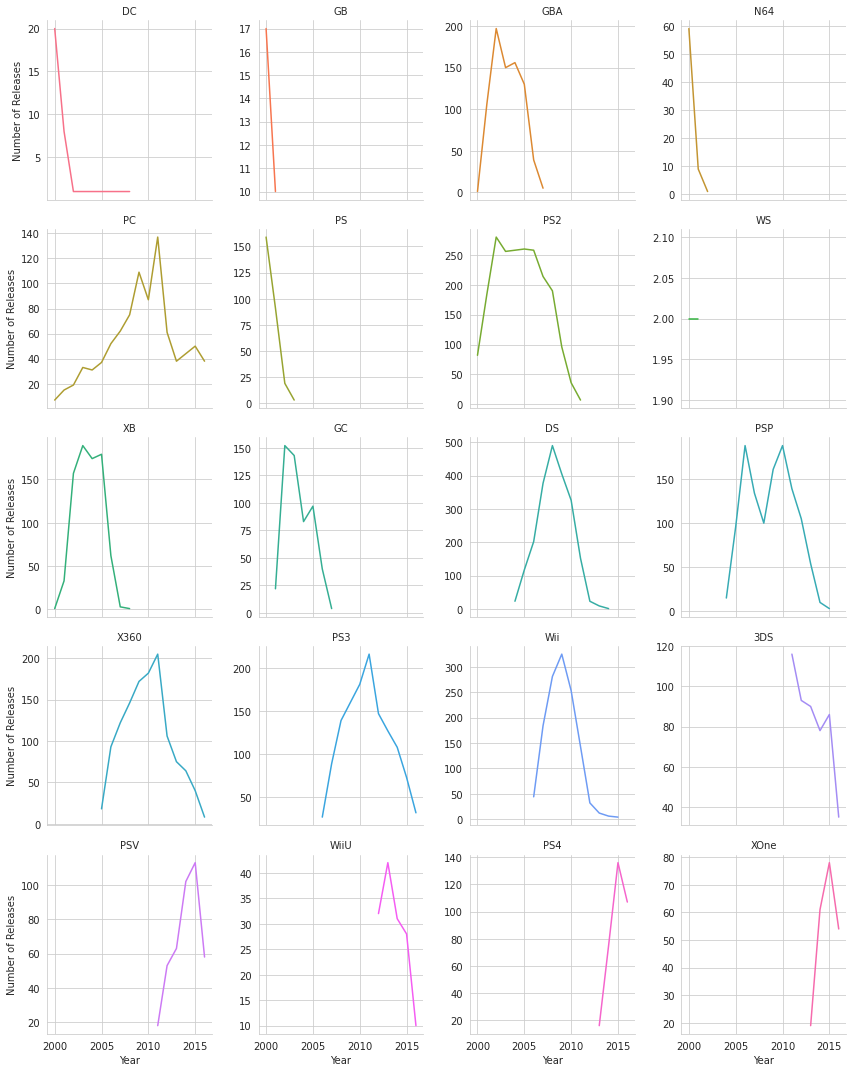

In [42]:
platform_per_year = df_2000_2016.groupby(["Year", "Platform"]).size().reset_index(name="Count")

# Facet Grid로 시각화
g = sns.FacetGrid(platform_per_year, col="Platform", col_wrap=4, hue="Platform", sharey=False)
g = g.map(sns.lineplot, "Year", "Count")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Releases")
plt.show()

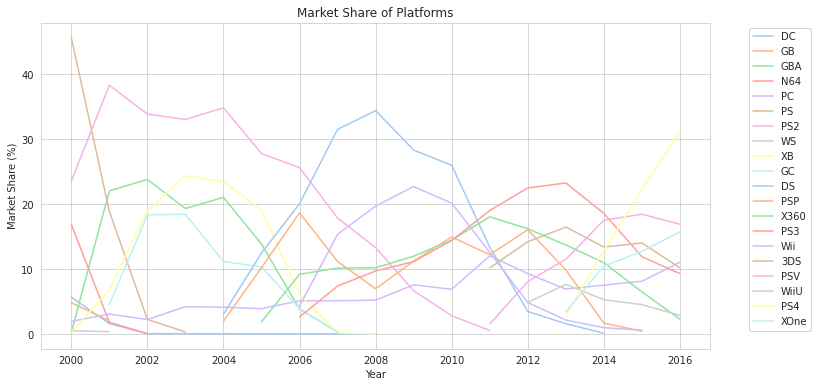

In [43]:
plt.figure(figsize=(12, 6))

# 플랫폼마다 연도순으로 나열하기
platforms = platform_year_count['Platform'].unique()
for platform in platforms:
    df_temp = platform_year_count[platform_year_count['Platform'] == platform]
    plt.plot(df_temp['Year'], df_temp['Percent'], label=platform)

# 그래프 설정
plt.title('Market Share of Platforms')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

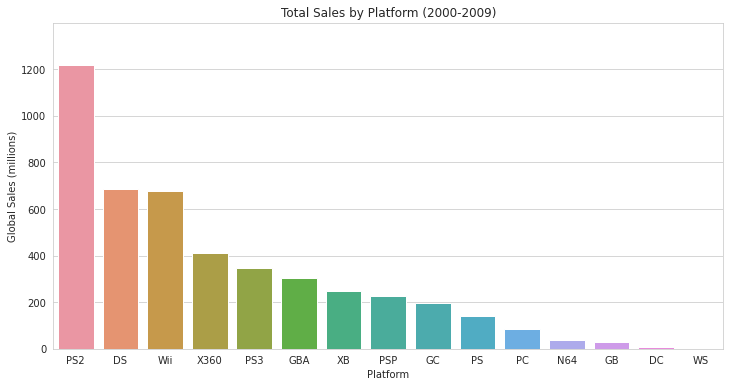

In [44]:
# 2000~2009 플랫폼별 총 판매량 계산
df_total_sales = df_2000_2009.groupby("Platform")["Total_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_total_sales.index, y=df_total_sales.values)
plt.title('Total Sales by Platform (2000-2009)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.ylim([0, 1400])
plt.yticks(range(0, 1400, 200))
plt.show()


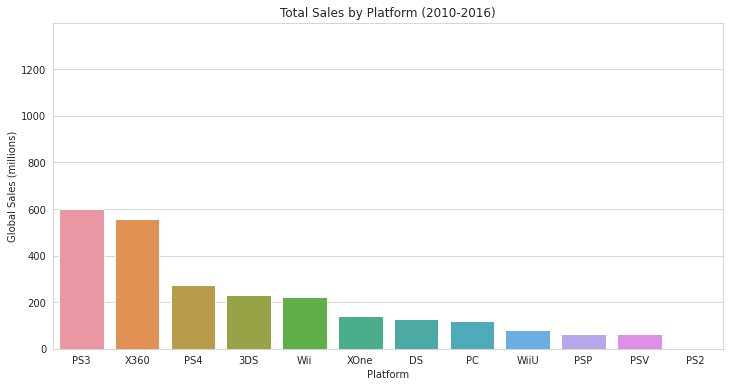

In [45]:
# 2010~2016 플랫폼별 총 판매량 계산
df_total_sales = df_2010_2016.groupby("Platform")["Total_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_total_sales.index, y=df_total_sales.values)
plt.title('Total Sales by Platform (2010-2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.ylim([0, 1400])
plt.yticks(range(0, 1400, 200))
plt.show()


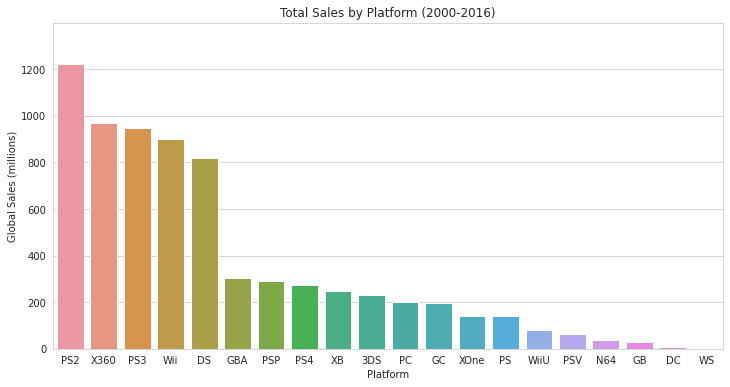

In [46]:
# 2000~2016 플랫폼별 총 판매량 계산
df_total_sales = df_2000_2016.groupby("Platform")["Total_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_total_sales.index, y=df_total_sales.values)
plt.title('Total Sales by Platform (2000-2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.ylim([0, 1400])
plt.yticks(range(0, 1400, 200))
plt.show()

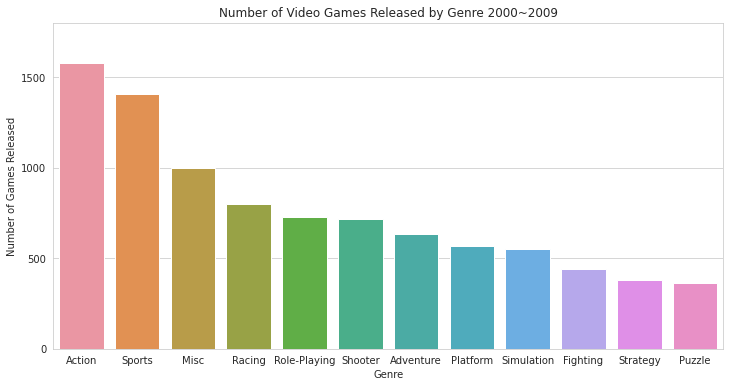

In [47]:
# 2) 장르별 발매 변화
# 2000~2009 장르별 발매 건수 구하기
genre_year_count = df_2000_2009.groupby(['Genre', 'Year']).agg({'Name': 'count'}).reset_index()

# 전체 발매 수에서 가장 비율이 높은 장르 구하기
total_count_g = genre_year_count.groupby('Genre').agg({'Name': 'sum'}).reset_index()
total_count_g['Percent'] = total_count_g['Name'] / total_count_g['Name'].sum() * 100
total_count_g = total_count_g.sort_values(by='Percent', ascending=False)

# 시각화하기
plt.figure(figsize=(12, 6))
sns.barplot(data=total_count_g, x='Genre', y='Name')
plt.title('Number of Video Games Released by Genre 2000~2009')
plt.xlabel('Genre')
plt.ylabel('Number of Games Released')
plt.ylim([0, 1800])
plt.yticks(range(0, 1800, 500))
plt.show()



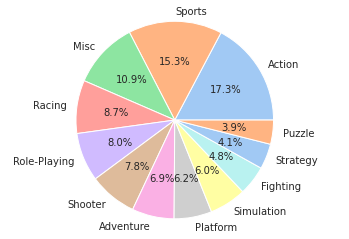

In [48]:
labels = total_count_g['Genre']
sizes = total_count_g['Percent']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.show()

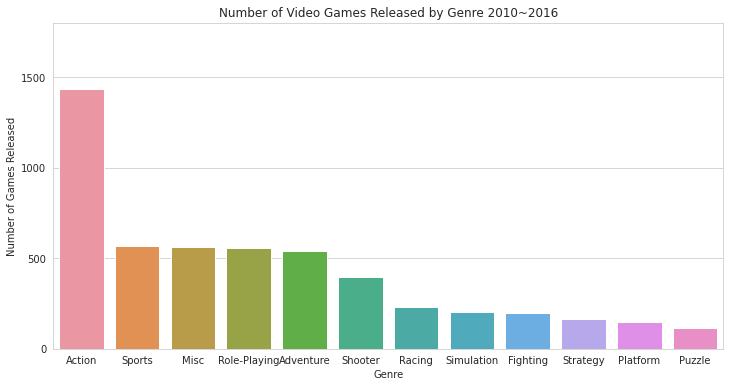

In [49]:
# 2) 장르별 발매 변화
# 2010~2016 장르별 발매 건수 구하기
genre_year_count = df_2010_2016.groupby(['Genre', 'Year']).agg({'Name': 'count'}).reset_index()

# 전체 발매 수에서 가장 비율이 높은 장르 구하기
total_count_g = genre_year_count.groupby('Genre').agg({'Name': 'sum'}).reset_index()
total_count_g['Percent'] = total_count_g['Name'] / total_count_g['Name'].sum() * 100
total_count_g = total_count_g.sort_values(by='Percent', ascending=False)

# 시각화하기
plt.figure(figsize=(12, 6))
sns.barplot(data=total_count_g, x='Genre', y='Name')
plt.title('Number of Video Games Released by Genre 2010~2016')
plt.xlabel('Genre')
plt.ylabel('Number of Games Released')
plt.ylim([0, 1800])
plt.yticks(range(0, 1800, 500))
plt.show()



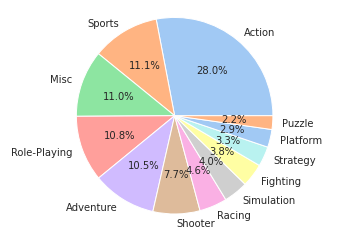

In [50]:
labels = total_count_g['Genre']
sizes = total_count_g['Percent']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.show()

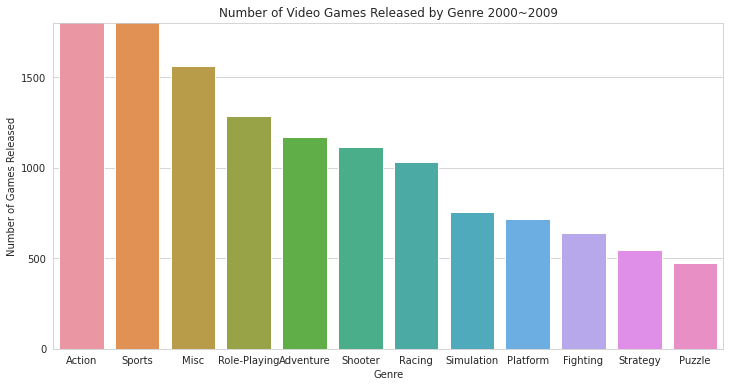

In [51]:
# 2) 장르별 발매 변화
# 2000~2016 장르별 발매 건수 구하기
genre_year_count = df_2000_2016.groupby(['Genre', 'Year']).agg({'Name': 'count'}).reset_index()

# 전체 발매 수에서 가장 비율이 높은 장르 구하기
total_count_g = genre_year_count.groupby('Genre').agg({'Name': 'sum'}).reset_index()
total_count_g['Percent'] = total_count_g['Name'] / total_count_g['Name'].sum() * 100
total_count_g = total_count_g.sort_values(by='Percent', ascending=False)

# 시각화하기
plt.figure(figsize=(12, 6))
sns.barplot(data=total_count_g, x='Genre', y='Name')
plt.title('Number of Video Games Released by Genre 2000~2009')
plt.xlabel('Genre')
plt.ylabel('Number of Games Released')
plt.ylim([0, 1800])
plt.yticks(range(0, 1800, 500))
plt.show()



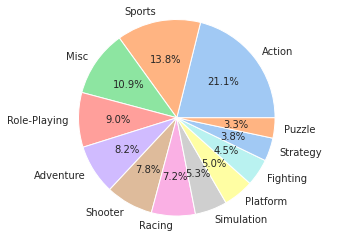

In [52]:
labels = total_count_g['Genre']
sizes = total_count_g['Percent']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.show()

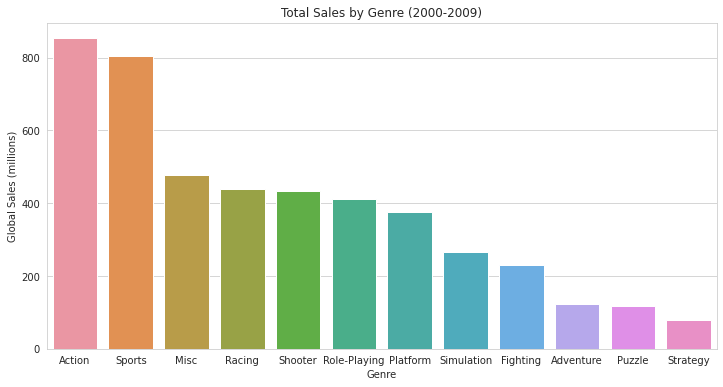

In [53]:
# 2000~2009 장르별 총 판매량 계산
df_total_sales = df_2000_2009.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_total_sales.index, y=df_total_sales.values)
plt.title('Total Sales by Genre (2000-2009)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.yticks(range(0, 1000, 200))
plt.show()


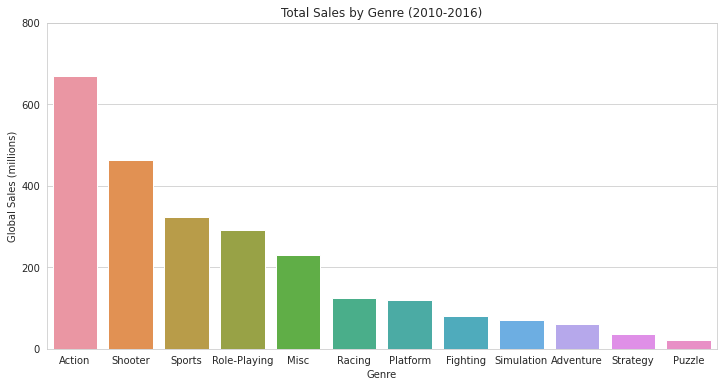

In [54]:
# 2010~2016 장르별 총 판매량 계산
df_total_sales = df_2010_2016.groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_total_sales.index, y=df_total_sales.values)
plt.title('Total Sales by Genre (2010-2016)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.yticks(range(0, 1000, 200))
plt.show()

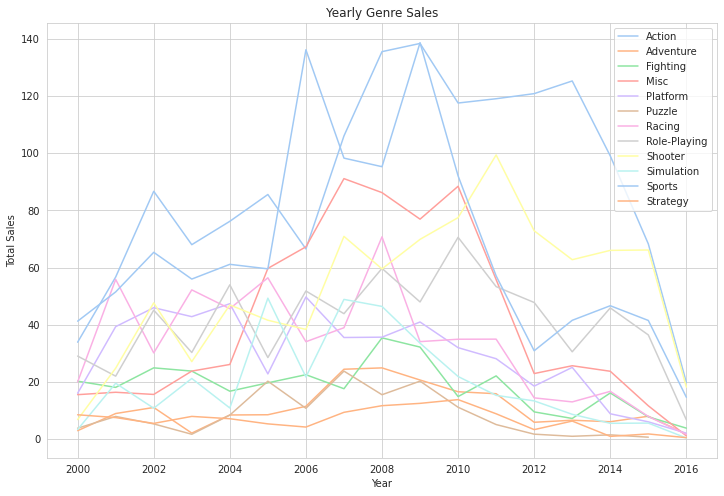

In [55]:
# 2000~2016 장르별 점유율 변화
genre_yearly_sales = df_2000_2016.groupby(['Year', 'Genre'])['Total_Sales'].sum().reset_index()
genre_sales_pivot = genre_yearly_sales.pivot(index='Year', columns='Genre', values='Total_Sales')

plt.figure(figsize=(12, 8))

for column in genre_sales_pivot.columns:
    plt.plot(genre_sales_pivot.index, genre_sales_pivot[column], label=column)

plt.legend(loc='best')
plt.title('Yearly Genre Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [56]:
# 3) 연도별 인기 많은 게임 분석
# 2000년부터 2016년까지 연도별 게임 판매량 상위 5개 게임 추출
top_games_by_year = df_2000_2016.groupby(['Year', 'Name', 'Genre','Platform'])['Total_Sales'].sum().reset_index()
top_games_by_year = top_games_by_year.sort_values(['Year', 'Total_Sales'], ascending=[True, False])
top_games_by_year = top_games_by_year.groupby('Year').head(5)
pd.set_option('display.max_rows', None)
top_games_by_year

,Year,Name,Genre,Platform,Total_Sales
226,2000,Pokémon Crystal Version,Role-Playing,GB,6.39
110,2000,Final Fantasy IX,Role-Playing,PS,5.31
86,2000,Driver 2,Action,PS,4.73
318,2000,Tony Hawk's Pro Skater 2,Sports,PS,4.68
83,2000,Dragon Quest VII: Warriors of Eden,Role-Playing,PS,4.46
497,2001,Gran Turismo 3: A-Spec,Racing,PS2,14.97
499,2001,Grand Theft Auto III,Action,PS2,13.10
474,2001,Final Fantasy X,Role-Playing,PS2,8.04
749,2001,Super Smash Bros. Melee,Fighting,GC,7.06
503,2001,Halo: Combat Evolved,Shooter,XB,6.43


# 2. 출시 타겟 지역 선정
- 시장 규모가 큰 지역 : 게임 수요가 높은 지역(수익성 고려)
- 2019년에도 그 지역의 게임 수요가 여전히 높을까?

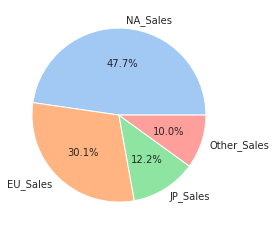

In [57]:
# 1) 시장 규모(게임 수요)가 큰 지역 선별
# 지역별 총 출고량 계산 (2000~2016)
sales_by_region = df_2000_2016.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# 전체 출고량 계산
total_sales = sales_by_region.sum(axis=1)

# 지역별 출고량이 전체 출고량에서 차지하는 비중 계산
sales_by_region_ratio = sales_by_region.div(total_sales, axis=0)

# 원그래프 그리기
plt.pie(sales_by_region_ratio.sum(), labels=sales_by_region_ratio.columns, autopct='%.1f%%')
plt.show()

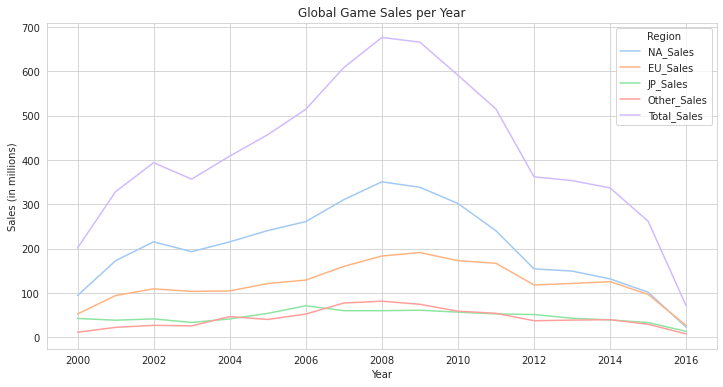

In [58]:
# 연도별 게임 출고량 분석
sales_per_year = df_2000_2016.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']].sum().reset_index()
sales_per_year = pd.melt(sales_per_year, id_vars=['Year'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'], var_name='Region', value_name='Sales')

# 시각화하여 연도별 게임 출고량 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_year, x='Year', y='Sales', hue='Region')
plt.title('Global Game Sales per Year')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.show()

In [59]:
# 각 연도별 전체 판매량을 계산
sales_by_year = df_2000_2016.groupby('Year')['Total_Sales'].sum()

# 판매량의 증가율을 계산
sales_growth = sales_by_year.pct_change()

# 증가율이 마이너스인 연도 출력
print(sales_growth[sales_growth < 0].index)

Int64Index([2003, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


In [60]:
# 2009년 이후로 전체적으로 판매량이 감소한 것을 알 수 있다. 
# 모바일 게임의 등장과 게임 산업의 구조적인 변화 때문이라고 유추해볼 수 있지만 데이터가 없어서 신뢰하기 힘들다.
# 전체 판매량이 감소해도 이전 분석 결과로부터 북미지역의 게임 시장이 상대적으로 큰 비중을 차지한다는 것을 알 수 있다.

In [61]:
# 2000~2016년의 데이터를 이용하여 선형회귀분석을 통해 
# '2019년 각 지역의 게임 수요'를 예측해 봄. 

X = df_2000_2016[df_2000_2016['NA_Sales'] > 0].Year.values.reshape(-1, 1)
y = df_2000_2016[df_2000_2016['NA_Sales'] > 0].NA_Sales.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
prediction = model.predict([[2018]])
print("NA_Sales: ", prediction[0][0])

X = df_2000_2016[df_2000_2016['EU_Sales'] > 0].Year.values.reshape(-1, 1)
y = df_2000_2016[df_2000_2016['EU_Sales'] > 0].EU_Sales.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
prediction = model.predict([[2018]])
print("EU_Sales: ", prediction[0][0])

X = df_2000_2016[df_2000_2016['JP_Sales'] > 0].Year.values.reshape(-1, 1)
y = df_2000_2016[df_2000_2016['JP_Sales'] > 0].JP_Sales.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
prediction = model.predict([[2018]])
print("JP_Sales: ", prediction[0][0])

X = df_2000_2016[df_2000_2016['Other_Sales'] > 0].Year.values.reshape(-1, 1)
y = df_2000_2016[df_2000_2016['Other_Sales'] > 0].Other_Sales.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
prediction = model.predict([[2018]])
print("Other_Sales: ", prediction[0][0])

NA_Sales:  0.3472095375809974
EU_Sales:  0.3079184097445449
JP_Sales:  0.045330450427176316
Other_Sales:  0.09997474190178002


In [62]:
# '2018년에도 북미지역의 게임 수요가 제일 높을까?'

# 귀무가설: 2018년의 북미지역의 게임 시장 비중은 다른 지역들과 차이가 없을 것이다.
# 대립가설: 2018년의 북미지역의 게임 시장 비중은 다른 지역들과 차이가 있을 것이다.

NA_sales_prop = 0.3472095375809974
EU_sales_prop = 0.3079184097445449
JP_sales_prop = 0.045330450427176316
Other_sales_prop = 0.09997474190178002

sample_props = [NA_sales_prop, EU_sales_prop, JP_sales_prop, Other_sales_prop]
null_props = [1/4, 1/4, 1/4, 1/4]

t_stat, p_val = stats.ttest_ind(sample_props, null_props)

if p_val < 0.05:
    print("p_value는 " + str(p_val) + "입니다. 귀무가설 기각. 2018년의 북미지역의 게임 시장 비중은 다른 지역들과 차이가 있을 것이다.")
else:
    print("귀무가설 채택. 2018년의 북미지역의 게임 시장 비중은 다른 지역들과 차이가 없을 것이다.")


귀무가설 채택. 2019년의 북미지역의 게임 시장 비중은 다른 지역들과 차이가 없을 것이다.


<ipython-input-62-9948766bbad1>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(sample_props, null_props)


In [63]:
total_sales = NA_sales_prop+EU_sales_prop+JP_sales_prop+Other_sales_prop


observed = np.array([NA_sales_prop, EU_sales_prop, JP_sales_prop, Other_sales_prop])
expected = np.array([0.25, 0.25, 0.25, 0.25])

chi2, p_value, _, _ = chi2_contingency([observed, expected])
if p_value < 0.05:
    print("p-value: {0:.4f}. 대립가설을 채택합니다.".format(p_value))
else:
    print("p-value: {0:.4f}. 귀무가설을 채택합니다.".format(p_value))


p-value: 0.9762. 귀무가설을 채택합니다.


In [65]:
# 결론 : Results may be unreliable.. 그냥 현재 제일 큰 비중의 북미지역 선정

# 3. 출시 장르 선정

- 해당 지역에서의 선호 게임 장르 파악
- 해당 지역에서, 미래(2019년 2분기)에는 어떤 게임의 선호도가 높을까?
> 고려해야 할 점
> - 결과가 현재 플랫폼 추세에 적합한 게임인가?
> - 플랫폼과 게임 장르의 합이 맞지 않으면 어떤 것을 우선적으로 고려해야 하나?

In [273]:
# '지역에 따라서 선호하는 게임 장르가 다를까'
# 귀무가설: 지역에 따라서 선호하는 게임 장르는 차이가 없다.
# 대립가설: 지역에 따라서 선호하는 게임 장르는 차이가 있다.
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# 북미지역에서의 게임 장르별 출고량 합계 계산 (2000~2016)
na_genre_sales = df_2000_2016.groupby('Genre')['NA_Sales'].sum()

# 유럽, 일본, 기타 지역에서의 게임 장르별 출고량 합계 계산 (2000~2016)
eu_genre_sales = df_2000_2016.groupby('Genre')['EU_Sales'].sum()
jp_genre_sales = df_2000_2016.groupby('Genre')['JP_Sales'].sum()
other_genre_sales = df_2000_2016.groupby('Genre')['Other_Sales'].sum()

# 각 지역의 게임 장르별 출고량 합계를 하나의 데이터프레임으로 합치기
genre_sales_by_region = pd.concat([na_genre_sales, eu_genre_sales, jp_genre_sales, other_genre_sales], axis=1)

# 컬럼명 변경
genre_sales_by_region.columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# 분산분석(ANOVA)을 수행하여 지역별로 선호하는 게임 장르가 차이가 있는지 검정
f_statistic, p_value = stats.f_oneway(genre_sales_by_region['NA_Sales'], genre_sales_by_region['EU_Sales'], genre_sales_by_region['JP_Sales'], genre_sales_by_region['Other_Sales'])

if p_value < 0.05:
    print("p_value는 " + str(p_value) + "입니다. 귀무가설 기각. 지역별로 선호하는 게임 장르는 차이가 있습니다.")
else:
    print("귀무가설 채택. 지역별로 선호하는 게임 장르는 차이가 없습니다.")

p_value는 0.0002658457736807062입니다. 귀무가설 기각. 지역별로 선호하는 게임 장르는 차이가 있습니다.


In [274]:
# '지역에 따라서 선호하는 게임 장르가 다르다'라는 가설 채택 하에 데이터 분석
# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
# 지역별 게임 장르별 출시 수
na_genre_count = df_2000_2016.groupby('Genre')['NA_Sales'].count()
eu_genre_count = df_2000_2016.groupby('Genre')['EU_Sales'].count()
jp_genre_count = df_2000_2016.groupby('Genre')['JP_Sales'].count()
other_genre_count = df_2000_2016.groupby('Genre')['Other_Sales'].count()

# 지역별 게임 장르별 평균 판매량
na_genre_mean_sales = df_2000_2016.groupby('Genre')['NA_Sales'].mean()
eu_genre_mean_sales = df_2000_2016.groupby('Genre')['EU_Sales'].mean()
jp_genre_mean_sales = df_2000_2016.groupby('Genre')['JP_Sales'].mean()
other_genre_mean_sales = df_2000_2016.groupby('Genre')['Other_Sales'].mean()

# 지역별로 출고량이 가장 높은 게임 장르(='가장 인기 있는 게임 장르'라고 설정)
na_popular_genre = na_genre_sales.idxmax()
eu_popular_genre = eu_genre_sales.idxmax()
jp_popular_genre = jp_genre_sales.idxmax()
other_popular_genre = other_genre_sales.idxmax()

#각 지역의 게임 장르별 출고량 합계 계산
na_genre_sales= na_genre_sales.sort_values(ascending=False)
eu_genre_sales= eu_genre_sales.sort_values(ascending=False)
jp_genre_sales= jp_genre_sales.sort_values(ascending=False)
other_genre_sales= other_genre_sales.sort_values(ascending=False)

#각 지역에서 가장 많이 팔린 게임 장르
print('North America:')
print(na_genre_sales.head(1))
print('\n')
print('Europe:')
print(eu_genre_sales.head(1))
print('\n')
print('Japan:')
print(jp_genre_sales.head(1))
print('\n')
print('Other regions:')
print(other_genre_sales.head(1))

North America:
Genre
Action    747.91
Name: NA_Sales, dtype: float64


Europe:
Genre
Action    469.27
Name: EU_Sales, dtype: float64


Japan:
Genre
Role-Playing    231.9
Name: JP_Sales, dtype: float64


Other regions:
Genre
Action    176.86
Name: Other_Sales, dtype: float64


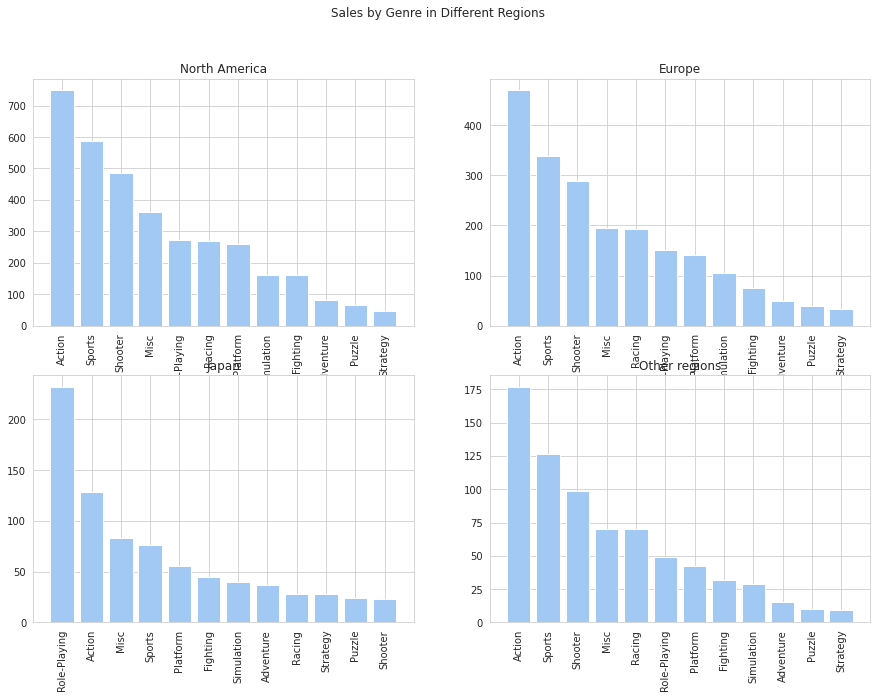

In [275]:
# 지역별 게임 장르별 출고량 시각화
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sales by Genre in Different Regions')

axs[0, 0].bar(na_genre_sales.index, na_genre_sales.values)
axs[0, 0].set_title('North America')
axs[0, 0].tick_params(axis='x', labelrotation=90)

axs[0, 1].bar(eu_genre_sales.index, eu_genre_sales.values)
axs[0, 1].set_title('Europe')
axs[0, 1].tick_params(axis='x', labelrotation=90)

axs[1, 0].bar(jp_genre_sales.index, jp_genre_sales.values)
axs[1, 0].set_title('Japan')
axs[1, 0].tick_params(axis='x', labelrotation=90)

axs[1, 1].bar(other_genre_sales.index, other_genre_sales.values)
axs[1, 1].set_title('Other regions')
axs[1, 1].tick_params(axis='x', labelrotation=90)

plt.show()

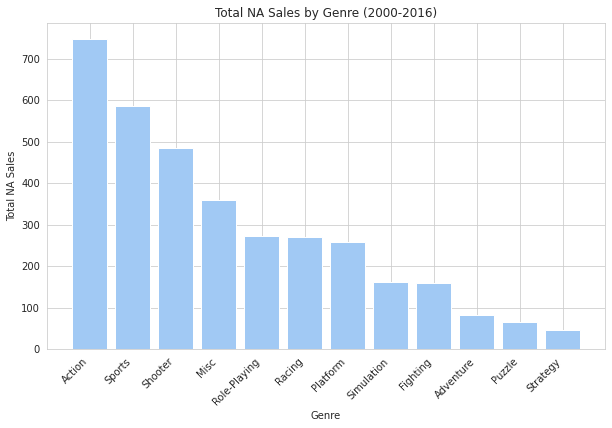

In [276]:
# 2000~2016년 북미지역 게임 장르별 출고량 합계 계산
na_sales_by_genre = df_2000_2016.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

# 막대그래프
plt.figure(figsize=(10, 6))
plt.bar(na_sales_by_genre.index, na_sales_by_genre.values)
plt.title('Total NA Sales by Genre (2000-2016)')
plt.xlabel('Genre')
plt.ylabel('Total NA Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

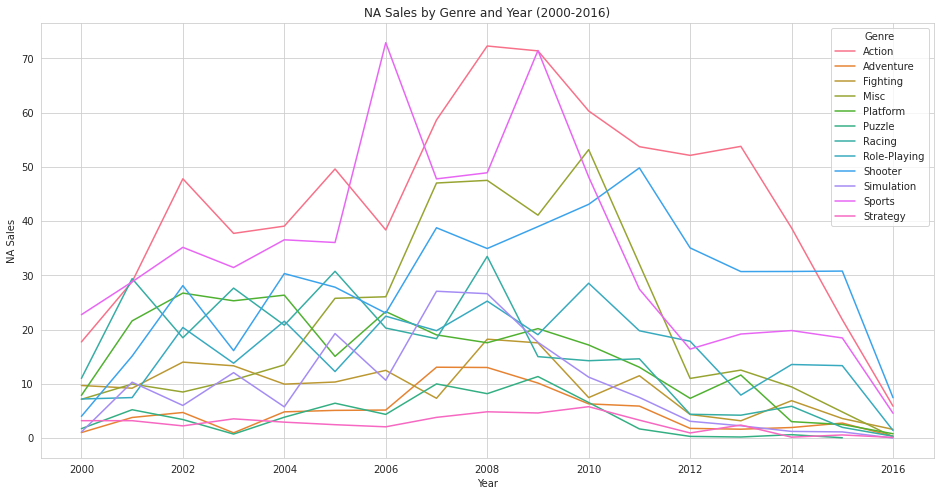

In [277]:
# 2000~2016년 북미지역 연도별 게임 장르 추세
na_genre_sales = df_2000_2016.groupby(['Year', 'Genre'])['NA_Sales'].sum().reset_index()

# 꺾은선그래프
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=na_genre_sales)
plt.title('NA Sales by Genre and Year (2000-2016)')
plt.xlabel('Year')
plt.ylabel('NA Sales')
plt.show()

In [278]:
# 2000~2016 데이터로 2019년 북미지역 예상 인기 장르 예측해봄
df_na_genre = df_2000_2016[['Genre', 'NA_Sales']]

X = np.arange(len(na_sales_by_genre)).reshape(-1, 1)
y = na_sales_by_genre.values
model = LinearRegression().fit(X, y)
prediction = model.predict([[len(na_sales_by_genre)]])

most_popular_genre = na_sales_by_genre.index[np.argmax(prediction)]
most_popular_genre

'Action'

# 4. 출시 플랫폼 선정

In [68]:
# 북미지역에서 2010~2016동안 제일 인기 많은 플랫폼 
df_na_platform = df_2010_2016.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).reset_index()
df_na_platform

,Platform,NA_Sales
0,X360,332.53
1,PS3,227.76
2,Wii,124.48
3,PS4,95.80
4,XOne,83.19
5,3DS,72.86
6,DS,62.57
7,WiiU,38.32
8,PC,37.97
9,PSV,16.07


In [69]:
df_platform = df_2010_2016.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
df_platform

,Platform,Total_Sales
0,PS3,601.19
1,X360,556.14
2,PS4,275.75
3,3DS,231.82
4,Wii,223.46
5,XOne,141.08
6,DS,129.31
7,PC,119.48
8,WiiU,81.79
9,PSP,64.31


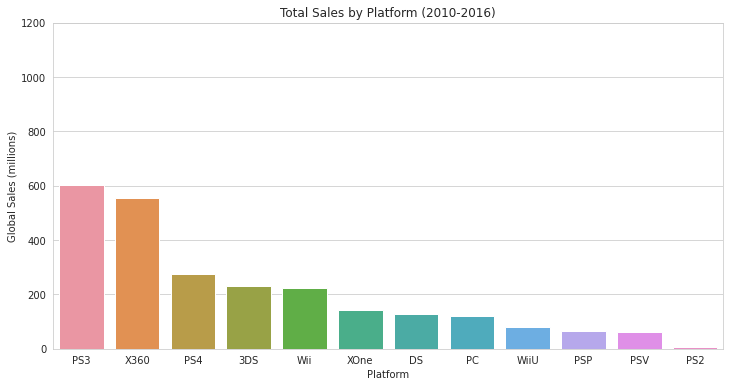

In [71]:
# 2010~2016 플랫폼별 총 판매량 계산
df_total_sales = df_2010_2016.groupby("Platform")["Total_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_total_sales.index, y=df_total_sales.values)
plt.title('Total Sales by Platform (2010-2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.yticks(range(0, 1400, 200))
plt.show()